# Data scraping log

This contains all intital attempts and may not be same as the final noebooks

In [5]:
import praw
import pandas as pd
import datetime as dt
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from yellowbrick.text import TSNEVisualizer


In [ ]:
reddit = praw.Reddit(client_id='8-xCwnG8N3QJOw', client_secret='Hu5luIlZWsHED__mLEqAYhoYfVOxSQ', user_agent='r/india', username='Dororo_hyaki')

In [ ]:
subreddit = reddit.subreddit('india')
labels_dict = {"flair":[], "title":[], "score":[], "id":[], "url":[], "comms_num": [], "created": [], "body":[], "author":[], "comments":[]}
flairs = ["AskIndia", "Non-Political", "[R]eddiquette", "Scheduled", "Photography", "Science/Technology", "Politics", "Business/Finance", "Policy/Economy", "Sports", "Food", "AMA","Coronavirus"]

In [ ]:
for flair in flairs:
  
  get_subreddits = subreddit.search(flair, limit=100)
  
  for submission in get_subreddits:
    
    labels_dict["flair"].append(flair)
    labels_dict["title"].append(submission.title)
    labels_dict["score"].append(submission.score)
    labels_dict["id"].append(submission.id)
    labels_dict["url"].append(submission.url)
    labels_dict["comms_num"].append(submission.num_comments)
    labels_dict["created"].append(submission.created)
    labels_dict["body"].append(submission.selftext)
    labels_dict["author"].append(submission.author)
    
    submission.comments.replace_more(limit=None)
    comment = ''
    for top_level_comment in submission.comments:
      comment = comment + ' ' + top_level_comment.body
    labels_dict["comments"].append(comment)

In [ ]:
def get_date(created):
    return dt.datetime.fromtimestamp(created)

However all these features were not required, hence finally only a few features were used

In [ ]:
subreddit = reddit.subreddit('india')
hot_subs = subreddit.hot()

In [ ]:
opics_dict = { "title":[], \
                "body":[],\
               "flair":[],\
               "comments":[]}

In [ ]:
for submission in hot_subs:
    topics_dict["title"].append(submission.title)
    topics_dict["body"].append(submission.selftext)
    topics_dict["flair"].append(submission.link_flair_text)
    submission.comments.replace_more(limit=None)
    comment = ''
    for top_level_comment in submission.comments:
      comment = comment + ' ' + top_level_comment.body
    topics_dict["comments"].append(comment)

In [ ]:
data = pd.DataFrame(topics_dict)

In [ ]:
def string(value):
    return str(value)`

In [ ]:
data['title'] = data['title'].apply(string)
data['body'] = data['body'].apply(string)
data['comments'] = data['comments'].apply(string)

In [ ]:
REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
STOPWORDS = set(stopwords.words('english'))
def text_cleaning(text):
   
    text = BeautifulSoup(text, "lxml").text
    text = text.lower()
    text = REPLACE_BY_SPACE_RE.sub(' ', text)
    text = BAD_SYMBOLS_RE.sub('', text)
    text = ' '.join(word for word in text.split() if word not in STOPWORDS)
    return text

In [ ]:
data['title'] = data['title'].apply(text_cleaning)
data['body'] = data['body'].apply(text_cleaning)
data['comments'] = data['comments'].apply(text_cleaning)

In [ ]:
data.to_csv('reddit.csv',index=False)

# EDA log

In [3]:
df=pd.read_csv('reddit.csv')
df.body.fillna(' ',inplace=True)
df.comments.fillna(' ',inplace=True)
df.title.fillna(' ',inplace=True)
df.flair.fillna(' ',inplace=True)
df=df.sample(frac=1)
df['text'] = df['title'].astype(str)+' ' + df['body'].astype(str) + " " + df['comments'].astype(str)

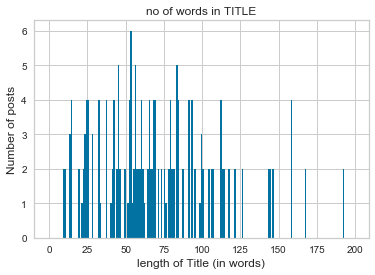

In [6]:
temp = df['title'].str.len()

temp.hist(bins = np.arange(0,200,1))
plt.title("no of words in TITLE")
plt.xlabel("length of Title (in words)", fontsize=12)
plt.ylabel("Number of posts", fontsize=12)
plt.savefig('title.png', dpi=300, bbox_inches='tight')
plt.show()

In [7]:
used_df=pd.DataFrame()
used_df['flair']=df['flair']
used_df['b_length']=df['body'].str.count(' ')+1
used_df['ti_length']=df['title'].str.count(' ')+1
used_df['c_length']=df['comments'].str.count(' ')+1
used_df['t_length']=df['text'].str.count(' ')+1

count    14.000000
mean     11.904501
std       5.870151
min       3.000000
25%       7.625000
50%      13.370130
75%      16.929487
max      20.052632
Name: ti_length, dtype: float64

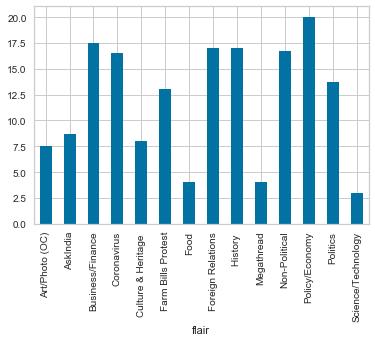

In [8]:
f=used_df.groupby('flair').mean().ti_length
f.plot(kind='bar')
f.describe()

In [9]:
z=df['flair'].unique()
tfidf = TfidfVectorizer()
y = df['flair']

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

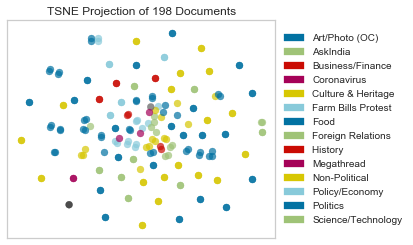

In [10]:
x = tfidf.fit_transform(df['text'])
y = df['flair']
tsne = TSNEVisualizer(labels=z)
tsne.fit(x, y)
tsne.poof()

In [11]:
from nltk.corpus import stopwords
stopwords = set(stopwords.words('english'))
from yellowbrick.features import RadViz
from sklearn.feature_extraction.text import CountVectorizer
from yellowbrick.text import FreqDistVisualizer
vectorizer = CountVectorizer(stop_words=stopwords)

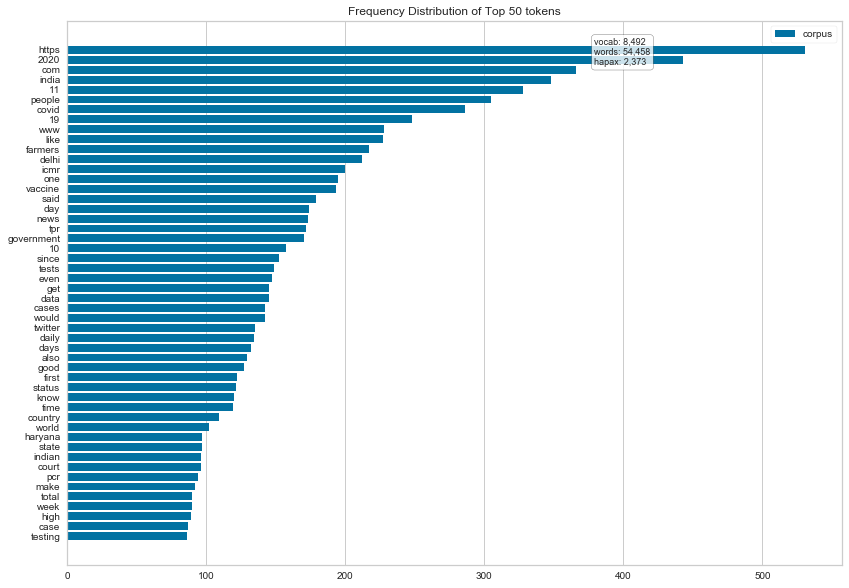

In [12]:
docs = vectorizer.fit_transform(df['text'])
features = vectorizer.get_feature_names()
visualizer = FreqDistVisualizer(features=features,size=(1000,720))
visualizer.fit(docs)
visualizer.poof()

These two eda were done using the initial columns saved from the submission

In [ ]:
f=df.groupby('flair').mean().comms_num
f.plot(kind='bar')

In [ ]:
fig = plt.figure()
g=df.groupby('flair').mean().score
g.plot(kind='bar')

In [ ]:
encoder=OneHotEncoder(handle_unknown='ignore')
ar=np.array(df.flair)
encoded=encoder.fit_transform(ar.reshape(-1, 1)).toarray()
sentences = df['text'].tolist()
labels = encoded.tolist()

# Separate out the sentences and labels into training and test sets
training_size = int(len(sentences) * 0.8)

training_sentences = sentences[0:training_size]
testing_sentences = sentences[training_size:]
training_labels = labels[0:training_size]
testing_labels = labels[training_size:]

# Make labels into numpy arrays for use with the network later
training_labels_final = np.array(training_labels)
testing_labels_final = np.array(testing_labels)
vocab_size = 2000
embedding_dim = 16
max_length = 1000
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"


from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index
sequences = tokenizer.texts_to_sequences(training_sentences)
padded = pad_sequences(sequences,maxlen=max_length, padding=padding_type, 
                       truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences,maxlen=max_length, 
                               padding=padding_type, truncating=trunc_type)
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(14, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

num_epochs = 10
model.fit(padded, training_labels_final, epochs=num_epochs, validation_data=(testing_padded, testing_labels_final))

e = model.layers[0]
weights = e.get_weights()[0]
print(weights.shape) # shape: (vocab_size, embedding_dim)

reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_review(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

print(decode_review(padded[1]))
print(training_sentences[1])
import io

# Write out the embedding vectors and metadata
out_v = io.open('vecs_int.tsv', 'w', encoding='utf-8')
out_m = io.open('meta_int.tsv', 'w', encoding='utf-8')
for word_num in range(1, vocab_size):
    word = reverse_word_index[word_num]
    embeddings = weights[word_num]
    out_m.write(word + "\n")
    out_v.write('\t'.join([str(x) for x in embeddings]) + "\n")
out_v.close()
out_m.close()

files.download('vecs_int.tsv')
files.download('meta_int.tsv')

The two files downloaded could be projected on http://projector.tensorflow.org/

# Model log

In [41]:
from sklearn.pipeline import Pipeline
import spacy
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import classification_report

In [14]:

nlp = spacy.load('en')
def lemmatize(msg):
    
    doc = nlp(msg)
    res=[]
    
    for token in doc:
        if(token.is_stop or token.is_punct or not(token.is_oov)): #Removing stopwords punctuations and words out of vocab
            pass
        else:
            res.append(token.lemma_.lower())
    
    return " ".join(res)
df['text'] = df['text'].apply(lemmatize)

In [17]:
nlp = spacy.load('en_core_web_lg')

In [18]:
X=np.array(df['text'])
y = df["flair"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
model= Pipeline([('preprocessing',TfidfVectorizer()),
                ('classifier',RandomForestClassifier(n_estimators=210,n_jobs=-1,random_state=0))])
model.fit(X_train,y_train)
model.score(X_train,y_train)

In [21]:
import tensorflow as tf

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [38]:
encoder=OneHotEncoder(handle_unknown='ignore')
ar=np.array(df.flair)
encoded=encoder.fit_transform(ar.reshape(-1, 1)).toarray()
sentences = df['text'].tolist()
labels = encoded.tolist()

# Separate out the sentences and labels into training and test sets
training_size = int(len(sentences) * 0.8)

training_sentences = sentences[0:training_size]
testing_sentences = sentences[training_size:]
training_labels = labels[0:training_size]
testing_labels = labels[training_size:]

# Make labels into numpy arrays for use with the network later
training_labels_final = np.array(training_labels)
testing_labels_final = np.array(testing_labels)
vocab_size = 2000
embedding_dim = 16
max_length = 1000
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"


from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index
sequences = tokenizer.texts_to_sequences(training_sentences)
padded = pad_sequences(sequences,maxlen=max_length, padding=padding_type, 
                       truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences,maxlen=max_length, 
                               padding=padding_type, truncating=trunc_type)
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(14, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 1000, 16)          32000     
_________________________________________________________________
flatten_4 (Flatten)          (None, 16000)             0         
_________________________________________________________________
dense_16 (Dense)             (None, 100)               1600100   
_________________________________________________________________
dense_17 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_18 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_19 (Dense)             (None, 14)                1414      
Total params: 1,653,714
Trainable params: 1,653,714
Non-trainable params: 0
____________________________________________

In [39]:
num_epochs = 10
model.fit(padded, training_labels_final, epochs=num_epochs, validation_data=(testing_padded, testing_labels_final))


Epoch 1/10
5/5 [==============================] - 0s 89ms/step - loss: 0.5849 - accuracy: 0.1899 - val_loss: 0.4093 - val_accuracy: 0.2250
Epoch 2/10
5/5 [==============================] - 0s 36ms/step - loss: 0.3206 - accuracy: 0.2658 - val_loss: 0.2380 - val_accuracy: 0.4000
Epoch 3/10
5/5 [==============================] - 0s 37ms/step - loss: 0.2330 - accuracy: 0.3861 - val_loss: 0.2145 - val_accuracy: 0.4000
Epoch 4/10
5/5 [==============================] - 0s 29ms/step - loss: 0.2130 - accuracy: 0.3987 - val_loss: 0.1923 - val_accuracy: 0.4250
Epoch 5/10
5/5 [==============================] - 0s 30ms/step - loss: 0.2042 - accuracy: 0.4241 - val_loss: 0.1910 - val_accuracy: 0.4000
Epoch 6/10
5/5 [==============================] - 0s 34ms/step - loss: 0.1914 - accuracy: 0.4177 - val_loss: 0.1916 - val_accuracy: 0.4000
Epoch 7/10
5/5 [==============================] - 0s 34ms/step - loss: 0.1881 - accuracy: 0.4304 - val_loss: 0.1907 - val_accuracy: 0.4000
Epoch 8/10
5/5 [===========

In [42]:
model= Pipeline([('preprocessing',TfidfVectorizer()),
                ('classifier',RandomForestClassifier(n_estimators=210,n_jobs=-1,random_state=0))])
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.775

In [50]:
y_pred = model.predict(X)

In [53]:
print(classification_report(y,y_pred))

                     precision    recall  f1-score   support

     Art/Photo (OC)       1.00      1.00      1.00         4
           AskIndia       1.00      0.87      0.93        23
   Business/Finance       1.00      1.00      1.00         8
        Coronavirus       1.00      1.00      1.00         4
Culture & Heritage        1.00      0.83      0.91        12
 Farm Bills Protest       1.00      1.00      1.00         2
               Food       1.00      1.00      1.00         3
  Foreign Relations       1.00      1.00      1.00         2
           History        1.00      1.00      1.00         2
         Megathread       1.00      1.00      1.00         1
      Non-Political       1.00      1.00      1.00        39
     Policy/Economy       1.00      0.89      0.94        19
           Politics       0.90      1.00      0.94        77
 Science/Technology       0.00      0.00      0.00         2

           accuracy                           0.95       198
          macro avg   

Therfore, except for politics and science and technology, our models works perfectly. Even though it shows slight amount of overfitting, still it works quite well on the test model.

Also the reason for the small fauilures of our model is quite clear.
* for science the number of samples is quite less, and hence it is difficult to make an accurate model
* in case of politics it involves a large number of issues, and hence again makes it difficult to form an accurate model